# Agent-Based Modeling of Marriages from Online Dating

#### Serena Chen and Apurva Raman

### Replicating the experiment in the [Strength of Absent Ties: Social Integration via Online Dating](https://arxiv.org/pdf/1709.10478.pdf.)

In [1]:
from __future__ import print_function, division

# %matplotlib inline
# %precision 3

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from marriages_replication import *

# from matplotlib import rc
# rc('animation', html='html5')

## Creating network

In [2]:
agents_per_race = 100
races = 3
agents = agents_per_race*races
genders=getGender(agents_per_race,races)
print(genders)

[[ 0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.
   1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.
   0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.
   0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  0.  1.
   0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.
   1.  1.  0.  1.  1.  0.  0.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  1.
   0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.
   1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.
   0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  1.  1.
   0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.
   0.  1.  0.  1.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.
   1.  1.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.
   1.  1.  1.  0.  1.  0. 

In [3]:
social_beliefs, political_beliefs = createPersonality(agents_per_race, races)
print ((social_beliefs,political_beliefs))

(array([ 0.3003807 ,  0.46333347,  0.69808151,  0.34500957,  0.48246089,
        0.0157608 ,  0.52514318,  0.31518819,  0.23874273,  0.58023189,
        0.95171631,  0.3397733 ,  0.45598998,  0.14893363,  0.99248336,
        0.13676551,  0.7802503 ,  0.12224611,  0.80255822,  0.28855017,
        0.47564773,  0.97128518,  0.00555835,  0.23581309,  0.83745064,
        0.20097515,  0.0748422 ,  0.2983688 ,  0.21151774,  0.32731207,
        0.63996042,  0.00262533,  0.72957202,  0.4332324 ,  0.44312451,
        0.86790167,  0.88380567,  0.04627779,  0.6335442 ,  0.86478171,
        0.41858167,  0.95773458,  0.50986985,  0.90441677,  0.70018983,
        0.51417726,  0.75552933,  0.45283523,  0.87559796,  0.70868162,
        0.79649812,  0.60993342,  0.84721763,  0.7012527 ,  0.7320396 ,
        0.8654071 ,  0.29159975,  0.61673542,  0.20132992,  0.6455674 ,
        0.18009534,  0.03298569,  0.53979319,  0.17538751,  0.95819946,
        0.61020611,  0.91155391,  0.76197157,  0.53587025,  0.4

In [4]:
adj, adj2, adj3 = createAdj(agents_per_race, races)

In [5]:
distances = getPersonalityDistances(agents, adj3, genders, social_beliefs, political_beliefs)
print(distances)

[[        inf         inf         inf ...,         inf  0.54097129
   0.53820817]
 [        inf         inf         inf ...,         inf  0.10538938
   0.58604552]
 [        inf         inf         inf ...,         inf  0.32538829
   0.49511846]
 ..., 
 [        inf         inf         inf ...,         inf  0.25534403
   0.82755139]
 [ 0.54097129  0.10538938  0.32538829 ...,  0.25534403         inf
          inf]
 [ 0.53820817  0.58604552  0.49511846 ...,  0.82755139         inf
          inf]]


## Creating Marriages

In [6]:
marriage, distances = createMarriages(agents, distances,genders)
print("-----------------------------")
print(marriage)
print(distances)

-----------------------------
[164   4 104  84   1 205 224 276 297 241 249  86 118  17  41 154 174  13
  32 135 277 256 166 290  39 212 184 151 172 160  65 119  18 262 287 110
  98  90 253  24 161  14 176  -1 218 147 170  96  95 111  52 121  50 155
 299 196 162 243 217 293 134 292  68 163 227  30 215 240  62 144  81  83
 257 191 285 109 116 280 244  -1  -1  70 230  71   3 251  11 206 222 264
  37 195 132 220 294  48  47 193  36 157 298 211 263 200   2 268 125 181
 271  75  35  49 149  -1 216 273  76 186  12  31 153  51 123 122 210 106
 259 185 254 235 291 165  92 275  60  19 242 168 258 260 234  -1 267 281
  69 180 202  45 175 112 274  27  -1 120  15  53 187  99 194 183  29  40
  56  63   0 131  22 255 137 171  46 169  28 226  16 148  42 245 248 207
 145 107 237 159  26 127 117 156 203  -1 213  73 208  97 158  91  55 296
 223  -1 103 232 146 188 288   5  87 179 192 250 124 101  25 190 225  66
 114  58  44 272  93 231  88 198   6 214 173  64 283 278  82 221 201 295
 140 129 279 182 265 

## Welfare measures

In [7]:
avg_dist = averageDistances(distances, marriage)
print(avg_dist)

0.085362831351


In [8]:
num_intra = numIntraracial(marriage, agents_per_race, races)
print(num_intra)

47.0


In [9]:
num_inter = numInterracial(num_intra, marriage)
print(num_inter)

98.0


In [10]:
diversity,percent_married,compatibility = welfareRatios(num_intra, num_inter, marriage, races, agents_per_race, avg_dist)
print(diversity,percent_married,compatibility)

1.01379310345 0.966666666667 0.93963936309


## Plotting a range of results

[ 0.          0.07142857  0.14285714  0.21428571  0.28571429  0.35714286
  0.42857143  0.5         0.57142857  0.64285714  0.71428571  0.78571429
  0.85714286  0.92857143  1.        ]


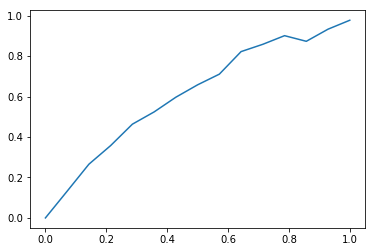

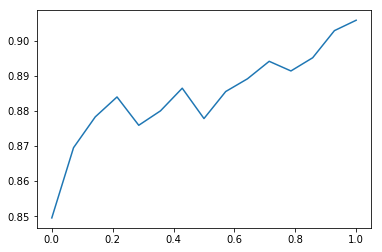

In [12]:

probabilities = np.linspace(0.0, 1.0, num=15, dtype=float)
num_sims = 30
print(probabilities)

diversities = []
strengths = []

for prob_interracial in probabilities:
    div_sum = 0.0
    str_sum = 0.0
    for _ in range(num_sims):
        div, married, strength = runSim(50, 2, 1.0, prob_interracial)
        div_sum += div
        str_sum += strength
    diversities.append(div_sum/num_sims)
    strengths.append(str_sum/num_sims)

plt.figure()
plt.plot(probabilities, diversities, label='diversities')
plt.figure()
plt.plot(probabilities, strengths, label='strengths')
plt.show()
    